# How to Build a Machine Learning Model in Python

## Learning Objectives
In the modeling stage of the machine learning process, our goal is to choose and apply the appropriate machine learning approach that works with the data we have and solves the problem that we intend to solve. If our objective is to build a model that predicts a numeric or continuous value, then our problem is known as a regression problem. One of the most common models used in solving regression problems is **Linear Regression**. By the end of the tutorial, you will have learned:

+ how to collect, explore and prepare data
+ how to build and evaluate a model

## 1. Collect the Data

In [2]:
import pandas as pd
bikes = pd.read_csv("bikes.csv")
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


## 2. Explore the Data

In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
temperature    731 non-null float64
humidity       731 non-null float64
windspeed      731 non-null float64
rentals        731 non-null int64
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [4]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


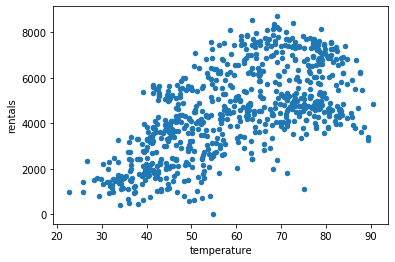

In [5]:
%matplotlib inline
bikes.plot(kind = 'scatter', x = 'temperature', y = 'rentals')

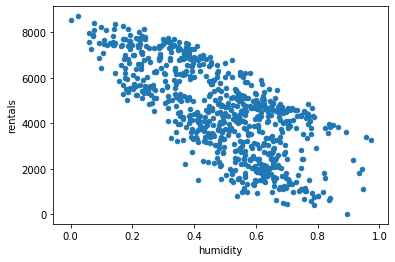

In [6]:
bikes.plot(kind = 'scatter', x = 'humidity', y = 'rentals')

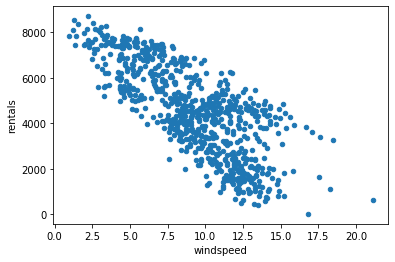

In [7]:
bikes.plot(kind = 'scatter', x = 'windspeed', y = 'rentals')

## 3. Prepare the Data

In [8]:
response = 'rentals'
y = bikes[[response]]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
5,1606
6,1510
7,959
8,822
9,1321


In [9]:
predictors = list(bikes.columns)
predictors.remove(response)
x = bikes[predictors]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
5,34.887841,0.665196,12.185233
6,34.225761,0.621516,12.428197
7,31.559000,0.602766,12.931739
8,29.302972,0.538448,13.580083
9,30.360472,0.572832,12.268820


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234) 

## 4. Train the Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [13]:
model.intercept_

array([3800.68469948])

In [16]:
model.coef_

array([[   80.35314543, -4665.73867387,  -196.21650368]])

The model coefficients correspond to the order in which the independent variables are listed in the training data. This means that the equation for the fitted regression line can be written as:

$y = 3800.68 + 80.35 \times temperature - 4665.74 \times humidity - 196.22 \times windspeed$

With the linear regression equation, we can estimate what our model will predict given any weather condition. For example, given a temperature of $72^{\circ}F$, $22\%$ humidity and windspeed of $5$ miles per hour, our model would predict:

$7,578 \text{ bikes} \approx 3800.68 + 80.35 \times 72 - 4665.74 \times .22 - 196.22 \times 5$


## 5. Evaluate the Model

In [17]:
model.score(x_test,y_test)

0.9820623857913312

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_pred

array([[ 557.43947112],
       [3575.47207354],
       [4812.63088879],
       [7528.64736936],
       [5031.98487142],
       [4487.81330642],
       [7737.0484636 ],
       [4510.14215352],
       [7293.73524785],
       [2163.20949145],
       [3804.19814551],
       [2127.53454277],
       [6730.82068468],
       [3362.69207228],
       [3633.2676828 ],
       [5931.56468032],
       [6793.9369413 ],
       [2984.5618093 ],
       [2014.65846877],
       [4033.79341746],
       [4751.03695889],
       [4993.01366089],
       [3882.96299337],
       [6512.04208618],
       [2476.83869867],
       [4471.94084617],
       [6277.98734395],
       [2001.04399988],
       [6184.1467469 ],
       [8801.13826205],
       [4509.0049366 ],
       [3319.26952902],
       [4646.15111922],
       [7411.69161896],
       [4989.79197694],
       [2802.32545482],
       [3500.76505411],
       [7901.35189112],
       [5070.41439198],
       [3755.84997022],
       [5304.36080441],
       [2096.360

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

194.31620720519683